## MNIST

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X = mnist["data"]

In [7]:
y = mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
28 * 28

784

In [11]:
import matplotlib.pyplot as plt

In [12]:
some_digit = X[0]

In [13]:
some_digit_img = some_digit.reshape(28, 28)

In [14]:
some_digit_img.shape

(28, 28)

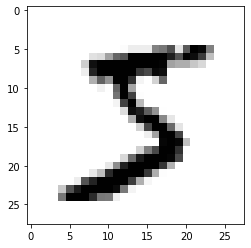

In [15]:
plt.imshow(some_digit_img, cmap="binary")

In [16]:
y[0]

'5'

In [17]:
y = y.astype(np.uint8)

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
(y_train == 0).sum()  # 60000개의 훈련 데이터 중에 0의 갯수는 5923개

5923

## 이진 분류기

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [23]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [24]:
(y_train_5 == 1).sum()

5421

In [25]:
(y_train_5 == 0).sum()

54579

In [26]:
# 불균형한 데이터셋에 대해서는 정확도가 성능 측정 지표가 안된다

In [27]:
X_train, y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [28]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [29]:
sgd_clf

SGDClassifier(random_state=42)

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) #점수가 아닌 예측을 한 값을 준다.

In [32]:
y_train_pred.shape

(60000,)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

정확도

(53892 + 3530) / (53892 + 687 + 1891 + 3530)

precision (정밀도)

3530 / (687 + 3530)

In [36]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

recall (재현율)m

3530 / (1891 + 3530)

In [37]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [38]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [39]:
#cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 해당과 비교가능
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function") #얼마나 정답에 가까운지 알려줌 0이 기준의 score임

In [40]:
y_scores #60000개일듯 임계치를 옮길 수도 있다.

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [53]:
y_scores.shape

(60000,)

In [41]:
from sklearn.metrics import precision_recall_curve

In [57]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 
#정답과 점수를 가지고 precision, recalls, thresholds값을 알려준다.

In [58]:
precisions #이걸 늘리면

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [55]:
recalls #이건 줄어든다.

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [43]:
thresholds

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

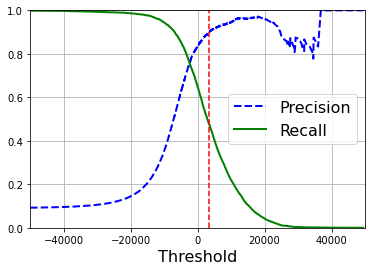

In [62]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.axvline(x = threshold_90_precision, color="r", linestyle="--")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [60]:
# 정밀도 90% 이상을 목표로 하고 싶을 때

In [65]:
precisions > 0.90

array([False, False, False, ...,  True,  True,  True])

In [44]:
np.argmax(precision >= 0.90) #57075번째 인덱스부터 90퍼센트임.

57075

In [45]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.90)] #true false에 argmax하면 맨 처음 보이는 true의 값을 가져온다.

In [66]:
threshold_90_precision #thresholds의 값이다. 기존의 0에서 3370으로 바뀜.

3370.0194991439557

In [67]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [69]:
(y_scores > threshold_90_precision) #정답을 바꿨다.

array([False, False, False, ...,  True, False, False])

In [46]:
y_train_predic_90 = (y_scores > threshold_90_precision)

In [47]:
y_train_predic_90

array([False, False, False, ...,  True, False, False])

In [48]:
precision_score(y_train_5, y_train_predic_90) #정밀도를 높이니까

0.9

In [49]:
recall_score(y_train_5, y_train_predic_90) #재현율은 낮아졌다.

0.47980077476480354

In [50]:
np.zeros((4, 1), dtype=bool)

array([[False],
       [False],
       [False],
       [False]])

In [70]:
from sklearn.metrics import plot_precision_recall_curve

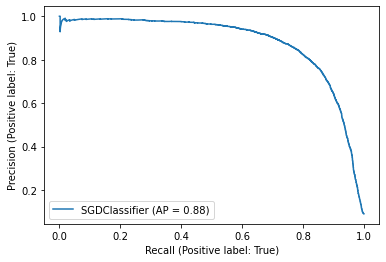

In [72]:
plot_precision_recall_curve(sgd_clf, X_train, y_train_5)

* ROC 곡선

In [73]:
from sklearn.metrics import roc_curve

In [98]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

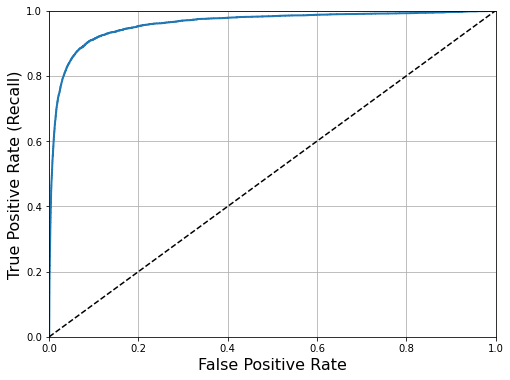

In [75]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.show() #FPR이 0인 부분일 수록 좋다. 완전 0.0보다 재현율도 꽤 높아져 있는 0.1언저리가 좋다.

In [77]:
from sklearn.metrics import roc_auc_score #area undered cover 벗어난 부분을 나타낸다.
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 분류

In [78]:
forest_clf = RandomForestClassifier(random_state=42)
#forest_clf.fit

In [81]:
y_scores[:5]

array([  1200.93051237, -26883.79202424, -33072.03475406, -15919.5480689 ,
       -20003.53970191])

In [83]:
y_scores_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba") # proba는 확률로 나온다.

In [84]:
y_scores_forest.shape

(60000, 2)

In [87]:
y_scores_forest[:2] #[음성확률, 양성확률] [5가 아닐확률, 5일 확률]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [88]:
y_scores_forest = y_scores_forest[:,1] #두개가 겹치기에 하나로만 나타내는게 좋다.

In [89]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [93]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [95]:
roc_auc_score(y_train_5, y_scores_forest) #정답률!

0.9983436731328145

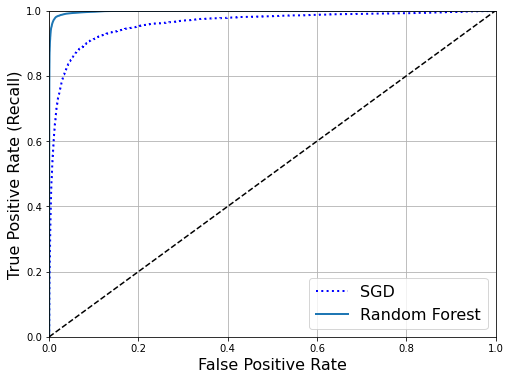

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [100]:
y_scores_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [103]:
precision_score(y_train_5, y_scores_pred_forest) #정밀도 재현율 둘다 높다.

0.9905083315756169

In [104]:
recall_score(y_train_5, y_scores_pred_forest)

0.8662608374838591

In [107]:
## 다중 분류

from sklearn.svm import SVC

In [108]:
svm_clf = SVC(gamma='auto', random_state=42)

In [109]:
svm_clf.fit(X_train[:1000], y_train[:1000])

SVC(gamma='auto', random_state=42)

In [110]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [111]:
some_digit # == 5

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [113]:
svm_clf.predict([some_digit]) # 5라고 예측함

SyntaxError: invalid syntax (<ipython-input-113-eb711b4d8c36>, line 1)

In [115]:
some_digit_scores = svm_clf.decision_function([some_digit])#해당값이 가지는 확신값들이 나오는데 '5'에서 9,29로 가장 크다.

In [116]:
np.argmax(some_digit_scores) #some digit은 가장 큰 값의 인덱스에 해당되는 것임

5

In [119]:
some_digit_scores[:,5]

array([9.29718395])

In [120]:
svm_clf.classes_ # value가 주어지고 인덱스 색인하면 n번째 값 나옴

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [121]:
svm_clf.classes_[5]

5

* SGDClassifier

선형 다중 분류 모델의 경우 ax^2+bx+c처럼 다차원 방정식의 모습임. 거리를 최소화하는 기울기와 절편인 파라미터를 찾는 모델.
60000개에 대한 특성 784개의 변수를 가지는 784차원 방정식임. (784는 columns의 수)

결론은 mnist에 맞지않는 모델이다.

스케일러를 해줘야하는 민감한모델

방정식의 결과값을 찍는 것이기에 방정식의 결과값이 해당 데이터에서는 5가 3에 가까운듯

In [123]:
sgd_clf.fit(X_train, y_train) 
#6만개의 데이터를 45번씩 돌리는 것임.

SGDClassifier(random_state=42)

In [124]:
bsgd_clf.predict([some_digit]) #3이 나오는 것은 잘못 에측하여 틀린 값임!

array([3], dtype=uint8)

In [125]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64)) # fit_transform으로 핏과 변환 동시에

In [130]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [131]:
y_train_pred

array([3, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [132]:
conf_mx = confusion_matrix(y_train, y_train_pred) #이진분류의 형태가 아닌 다중분류이므로 2 * 2 가 아니라 10*10인듯 1과 1사이에 있어야 잘한 것임.

In [133]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [135]:
import seaborn as sns

<AxesSubplot:>

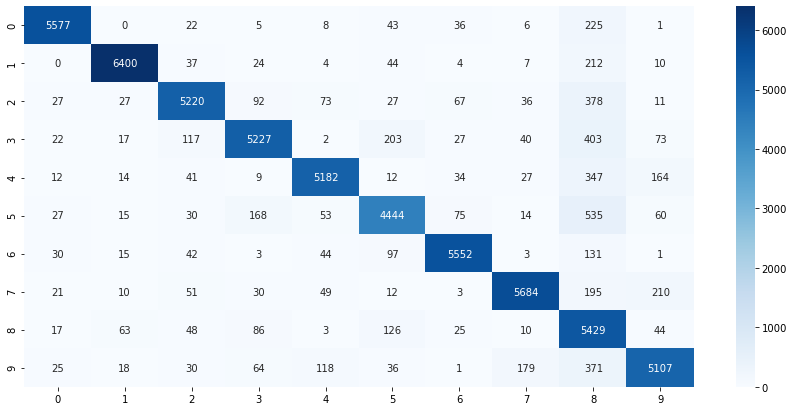

In [141]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mx, cmap='Blues', annot=True, fmt='.0f') #파랗게 될 수록 많이 예측된 것. 8을 5로 예측한 것이 꽤나 많음

In [144]:
row_sums = conf_mx.sum(axis=1)

In [147]:
norm_conf_mx = conf_mx / row_sums #벡터 연산이다 보니 한 행에만 맞춰도 모든 행을 나눠줌

<AxesSubplot:>

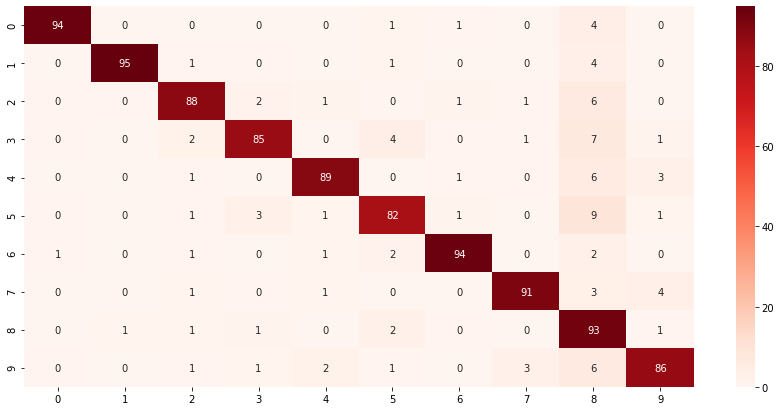

In [157]:
plt.figure(figsize=(15, 7))
sns.heatmap(norm_conf_mx*100, cmap='Reds', annot=True, fmt='.0f')
#8로 예측한 값중 오류가 꽤나 많다는 것을 알 수 있다.